<a href="https://colab.research.google.com/github/locemarn/DataScienceWithPython/blob/master/exercicio_regressao_marcelo_nogueira_203214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/brvnl/MultivariateLinearRegression/master/student/student-por.csv",
sep=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


## Análise e pré-processamento

In [3]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
# Verificar dados duplicados
print('Antes:', df.shape)
df = df.drop_duplicates()
print('Depois:', df.shape)

Antes: (649, 33)
Depois: (649, 33)


In [6]:
# Remover linhas com dados nulos
print('Antes:', df.shape)
df.dropna(inplace=True)
print('Depois:', df.shape)

Antes: (649, 33)
Depois: (649, 33)


### Ver a distribuição do dataset

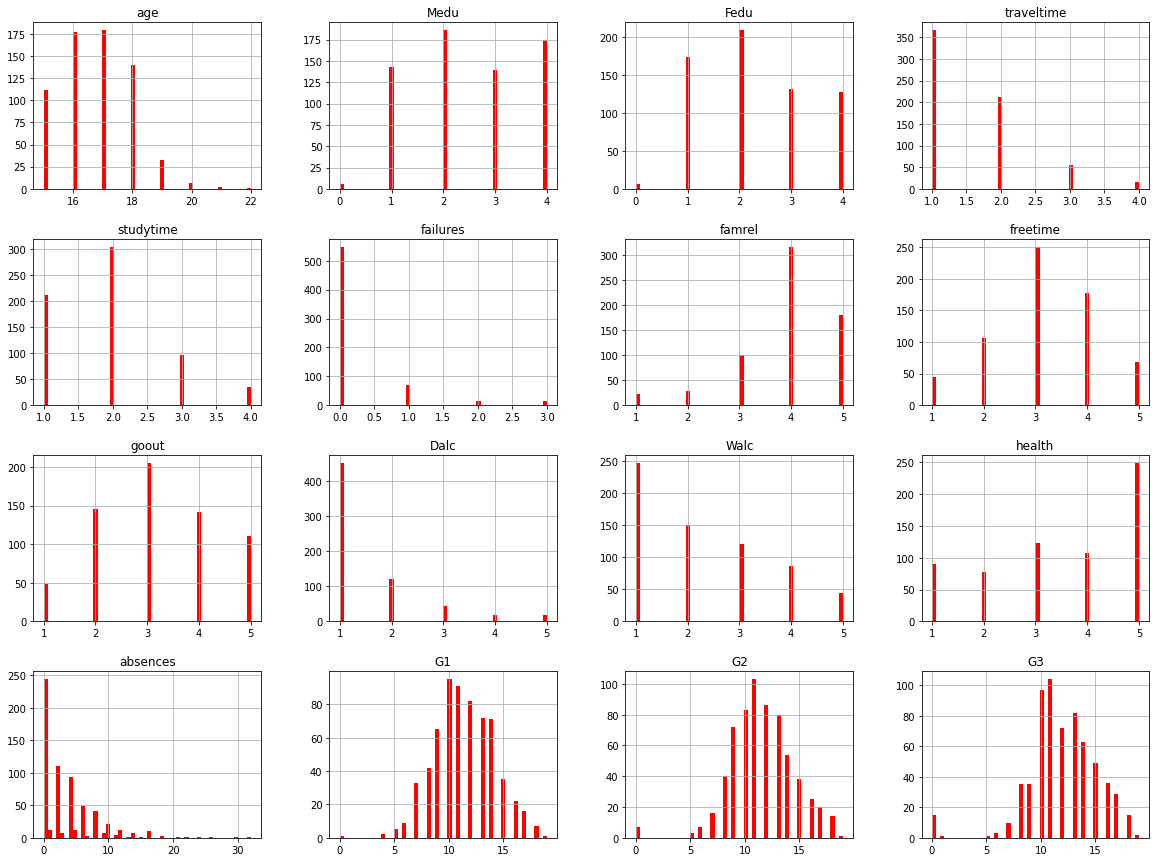

In [7]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15), color='r')
plt.show()

### Remoção das colunas G1 e G2 para tornar a predição por g3 nível maior

In [8]:
# g1 = df['G1']
# g2 = df['G2']

# df.drop(['G1', 'G2'], axis=1, inplace=True)
# g1

0       0
1       9
2      12
3      14
4      11
       ..
644    10
645    15
646    11
647    10
648    10
Name: G1, Length: 649, dtype: int64

### convertandos dados categ´roricos em binários

In [35]:
def converte_categorico_binario(coluna, comparacao):
    return df[coluna].apply(lambda x: 0 if x == comparacao else 1)


df['address'] = converte_categorico_binario('address', 'U')
df['famsize'] = converte_categorico_binario('famsize', 'LE3')
df['Pstatus'] = converte_categorico_binario('Pstatus', 'T')
df['famsup'] = converte_categorico_binario('famsup', 'no')
df['paid'] = converte_categorico_binario('paid', 'no')
df['activities'] = converte_categorico_binario('activities', 'no')
df['higher'] = converte_categorico_binario('higher', 'no')
df['internet'] = converte_categorico_binario('internet', 'no')
df['romantic'] = converte_categorico_binario('romantic', 'no')
df['nursery'] = converte_categorico_binario('nursery', 'no')
df['school'] = converte_categorico_binario('school', 'GP')
df['schoolsup'] = converte_categorico_binario('schoolsup', 'no')
df['sex'] = converte_categorico_binario('sex', 'F')

# esses possuem mais de 2 valores
df['guardian'] = df['guardian'].apply(lambda x: 0 if x == 'mother' else (1 if x=='father' else 2))
df['reason'] = df['reason'].apply(lambda x: 0 if x == 'home' else (1 if x=='reputation' else (3 if x=='course' else 4)))
df['Fjob'] = df['Fjob'].apply(lambda x: 0 if x == 'at_home' else (1 if x=='health' else (3 if x=='other' else (4 if x=='services' else 5))))
df['Mjob'] = df['Mjob'].apply(lambda x: 0 if x == 'at_home' else (1 if x=='health' else (3 if x=='other' else (4 if x=='services' else 5))))

In [10]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,0,1,1,4,4,0,5,3,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,11
1,0,0,17,0,1,0,1,1,0,3,3,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,11
2,0,0,15,0,0,0,1,1,0,3,4,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12
3,0,0,15,0,1,0,4,2,1,4,0,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14
4,0,0,16,0,1,0,3,3,3,3,0,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,1,0,2,3,4,3,3,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10
645,1,0,18,0,0,0,3,1,5,4,3,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,16
646,1,0,18,0,1,0,1,1,3,3,3,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,9
647,1,1,17,0,0,0,3,1,4,4,3,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10


In [36]:
corr = df.corr()
abs(corr['G3']).sort_values(ascending=False)

G3            1.000000
G2            0.918548
G1            0.826387
failures      0.393316
higher        0.332172
school        0.284294
studytime     0.249789
Medu          0.240151
Fedu          0.211800
Dalc          0.204719
Walc          0.176619
reason        0.170259
address       0.167637
internet      0.150025
Mjob          0.130074
sex           0.129077
traveltime    0.127173
freetime      0.122705
age           0.106505
health        0.098851
absences      0.091379
romantic      0.090583
goout         0.087641
schoolsup     0.066405
famrel        0.063361
activities    0.059791
famsup        0.059206
paid          0.054898
famsize       0.045016
Fjob          0.043669
guardian      0.029474
nursery       0.028752
Pstatus       0.000754
Name: G3, dtype: float64

### Remoção das colunas com baixíssima correlação com a coluna G3

In [37]:
df = df.drop(['Pstatus', 'nursery', 'guardian', 'Fjob', 'famsize', 'activities', 'famrel', 'schoolsup', 'goout', 'romantic', 'absences', 'health', 'age', 'freetime', 'traveltime', 'sex', 'Mjob', 'paid', 'famsup'], axis=1)

In [13]:
df

,school,address,Medu,Fedu,reason,studytime,failures,higher,internet,Dalc,Walc,G3
0,0,0,4,4,3,2,0,1,0,1,1,11
1,0,0,1,1,3,2,0,1,1,1,1,11
2,0,0,1,1,4,2,0,1,1,2,3,12
3,0,0,4,2,0,3,0,1,1,1,1,14
4,0,0,3,3,0,2,0,1,0,1,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,2,3,3,3,1,1,1,1,2,10
645,1,0,3,1,3,2,0,1,1,1,1,16
646,1,0,1,1,3,2,0,1,0,1,1,9
647,1,0,3,1,3,1,0,1,1,3,4,10


### plotando um heatmap com as colunas de melhor correlação com G3

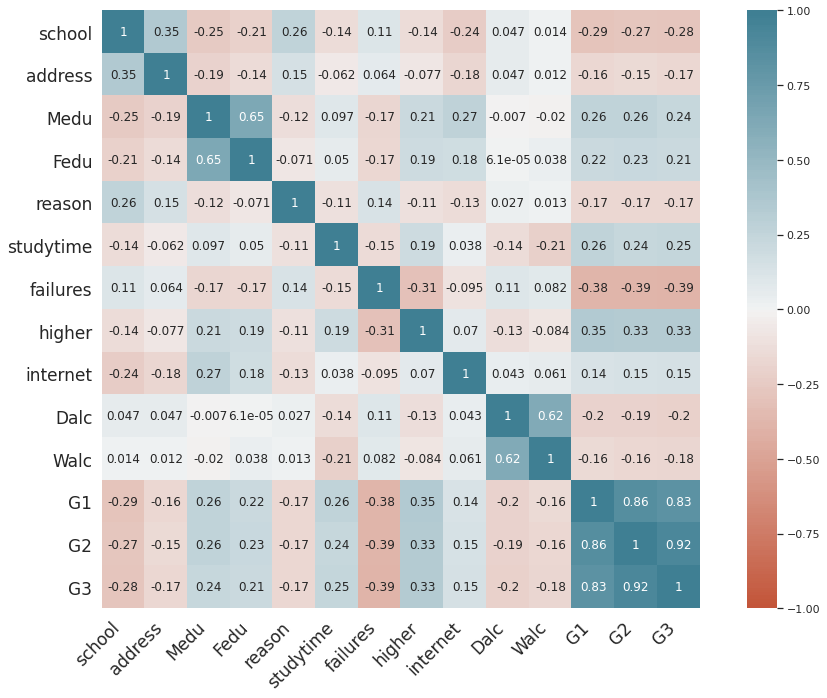

In [38]:
corr = df.corr()

sns.set(rc={'figure.figsize':(17,11)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    fontdict={'fontsize': 17},
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontdict={'fontsize': 17},
);

### Selecionando colunas com melhor correlação com G3 para trabalhar nos modelos

In [15]:
corr = df.corr()
abs(corr['G3']).sort_values(ascending=False)

G3           1.000000
failures     0.393316
higher       0.332172
school       0.284294
studytime    0.249789
Medu         0.240151
Fedu         0.211800
Dalc         0.204719
Walc         0.176619
reason       0.170259
address      0.167637
internet     0.150025
Name: G3, dtype: float64

In [39]:
df_independents = df.drop(['G3'], axis=1)
df_dependence = df['G3']
df_independents

,school,address,Medu,Fedu,reason,studytime,failures,higher,internet,Dalc,Walc,G1,G2
0,0,0,4,4,3,2,0,1,0,1,1,0,11
1,0,0,1,1,3,2,0,1,1,1,1,9,11
2,0,0,1,1,4,2,0,1,1,2,3,12,13
3,0,0,4,2,0,3,0,1,1,1,1,14,14
4,0,0,3,3,0,2,0,1,0,1,2,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,2,3,3,3,1,1,1,1,2,10,11
645,1,0,3,1,3,2,0,1,1,1,1,15,15
646,1,0,1,1,3,2,0,1,0,1,1,11,12
647,1,0,3,1,3,1,0,1,1,3,4,10,10


### Dividindo o dataset em treino e teste

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_independents, df_dependence, test_size=0.2, random_state=42)

In [41]:
# função que roda os modelos de regressão e printa R² e RMSE
def run_reg_models(regressor_names, regressors, X_train, X_test, y_train, y_test):
    counter = 0
    for name, clf in zip(regressor_names, regressors):
        result = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        model_performance = pd.DataFrame(
            data=[r2_score(y_test, y_pred),
            np.sqrt(mean_squared_error(y_test, y_pred))],
            index=['R2', 'RMSE']
        )
        
        print(name + ' performance: ')
        print(model_performance)
        print('---------------------------------')

In [42]:
#dados dos modelos para serem passados a função acima
regressor_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

regressors = [
    linear_model.LinearRegression(normalize=True),
    linear_model.Ridge(alpha=0, normalize=True),
    linear_model.Lasso(alpha=0.01, normalize=True)
]

run_reg_models(regressor_names, regressors, X_train, X_test, y_train, y_test)

Linear Regression performance: 
             0
R2    0.855264
RMSE  1.188034
---------------------------------
Ridge Regression performance: 
             0
R2    0.855264
RMSE  1.188034
---------------------------------
Lasso Regression performance: 
             0
R2    0.868320
RMSE  1.133185
---------------------------------


### Rodando com o modelo RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth=10)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_train)

errors = abs(rf_predictions - y_train)

# Print out the mean absolute error (mae)
print('Mean Absolute Error (MAE)):', round(np.mean(errors), 2), 'degrees.')
print('RMSE', np.sqrt(round(np.mean(errors), 2)))

# Acurácia
acc_score = rf.score(X_train, y_train)
print('ACC', acc_score)


Mean Absolute Error (MAE)): 0.38 degrees.
RMSE 0.6164414002968976
ACC 0.9710460925193388


### Rodando GridSearch para descobrir melhores parâmetros para o Random Forest

In [45]:
def Grid_Search_CV_RFR(x, y):
  rf=RandomForestRegressor(random_state = 42, max_depth=10)
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

  param_grid = { 
    "n_estimators"      : [10, 20, 30, 50, 100, 500, 1000],
    "max_features"      : ["auto", "sqrt", "log2"],
    "min_samples_split" : [2,4,8],
    "bootstrap"         : [True, False]
  }

  CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
  CV_rf.fit(x, y)

  return CV_rf.best_score_, CV_rf.best_params_

In [46]:
best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)

print('best_score -> ', best_score)
print('best_params -> ', best_params)

best_score ->  0.831531067441998
best_params ->  {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 500}


In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_independents, df_dependence, test_size=0.1, random_state=42)

best_rf = RandomForestRegressor(bootstrap=True, max_features='sqrt', min_samples_split=8, n_estimators=500, random_state = 42, max_depth=10)
best_rf.fit(X_train, y_train)
pred = best_rf.predict(X_test)
print("Accuracy de Random Forest com GridSearchCV: ", best_rf.score(X_train, y_train))

Accuracy de Random Forest com GridSearchCV:  0.8965863164220793


#### Após rodar o GRIDSEARCH no melhor modelo de RandomForestRegressor, notamos que caiu nosso valor de acurácia, com isso decidi usar o RandomForestRegressor com os parâmetros básicos que teve uma melhor acurácia e um baixo erro.


### Fazendo a predição para cada aluno

In [48]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth=10)
rf.fit(X_train, y_train)

def calculate_predict(values):
  return rf.predict(values)

#### tabela comparando valor atual e com o predict

In [49]:

preds = []

for index, row in enumerate(df.values):
  # print(row[:-1].reshape(1, -1))
  res = calculate_predict(row[:-1].reshape(1, -1))
  res = round(res[0], 2)
  preds.append(res)


In [50]:
comparacao = pd.DataFrame({'Atual': df['G3'], 'Predict': preds})
comparacao.head(50)

,Atual,Predict
0,11,10.85
1,11,11.03
2,12,13.43
3,14,14.32
4,13,13.03
5,13,12.78
6,13,12.89
7,13,13.00
8,17,16.59
9,13,12.95
